## Mini Project III

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.cluster import KMeans

In [3]:
customerInformation = pd.read_csv('twm_customer.csv',sep=";")
accountInformation = pd.read_csv('twm_accounts.csv', sep=";")
transactionsInformation = pd.read_csv('twm_transactions.csv', sep=";")

In [122]:
dfIncomeDroppedUnderAged['stateCodeAverage'] = dfIncomeDroppedUnderAged.groupby('state_code')['income'].transform('mean')

In [102]:
customerInformation = customerInformation.sort_values(by='stateCodeAverage')

<AxesSubplot:xlabel='state_code'>

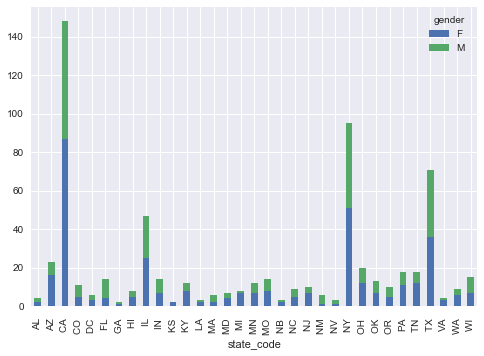

In [160]:
dfIncomeDroppedUnderAged.groupby(['state_code', 'gender']).size().unstack().plot(kind='bar', stacked=True)

In [165]:
dfIncomeDroppedUnderAged['age'].describe()

count    645.000000
mean      46.800000
std       16.912783
min       18.000000
25%       34.000000
50%       46.000000
75%       58.000000
max       89.000000
Name: age, dtype: float64

In [169]:
def ageClassfier(row):
    if(row['age'] < 34):
        return 'A'
    elif (row['age'] < 46):
        return 'B'
    elif(row['age'] < 58):
        return 'C'
    else:
        return 'D'

In [170]:
dfIncomeDroppedUnderAged['classifier'] = dfIncomeDroppedUnderAged.apply(ageClassfier,axis=1)

In [171]:
dfIncomeDroppedUnderAged.groupby(['state_code', 'classifier']).size().unstack().plot(kind='bar', stacked=True)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,stateCodeAverage,classifier
269,1362921,19987,45,5,2,F,3,,Nora ...,Besa ...,4300,El Paso ...,67276,Wichita,KS,9096.333333,B
499,1363296,7302,19,4,0,F,1,,Hana ...,O'Neil ...,16192,Flower ...,67225,Wichita,KS,9096.333333,A
363,1363079,25426,46,6,1,F,2,,Irene ...,McVicker ...,14382,Peach ...,96822,Honolulu,HI,11851.230769,C
9,1363078,9622,46,6,1,M,2,Mr.,Christopher ...,McVicker ...,14382,Peach ...,96822,Honolulu,HI,11851.230769,C
238,1362637,23973,45,5,0,F,1,Miss,Daisy ...,McSherry ...,15005,Cactus ...,96839,Honolulu,HI,11851.230769,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,1362960,57642,59,9,1,M,2,Mr.,Miles ...,Finley ...,2337,Oleander ...,28223,Charlotte,NC,37358.333333,D
599,1362556,56088,46,6,0,M,1,,Bob ...,McCracken ...,17276,Cactus ...,28215,Charlotte,NC,37358.333333,C
571,1362598,49437,47,7,2,F,2,,Susanne ...,Hemler ...,11890,Begonia ...,28224,Charlotte,NC,37358.333333,C
314,1362551,23085,27,6,0,F,1,Ms.,Faye ...,McGinty ...,10194,E ...,28243,Charlotte,NC,37358.333333,A


In [163]:
dfIncomeDroppedUnderAged.groupby(['state_code']).income.mean

In [159]:
customerInformation.groupby(['state_code', 'gender'])['income'].mean()

state_code  gender
AL          F         11890.500000
            M         12119.000000
AZ          F         18981.625000
            M         31687.750000
CA          F         20085.373832
                          ...     
VA          M         86744.000000
WA          F         20018.333333
            M         16489.000000
WI          F         13397.142857
            M         27636.625000
Name: income, Length: 66, dtype: float64

In [147]:
dfIncomeDroppedUnderAged = customerInformation.drop(customerInformation[customerInformation.income == 0].index)

In [150]:
description = dfIncomeDroppedUnderAged.income.describe()

<BarContainer object of 666 artists>

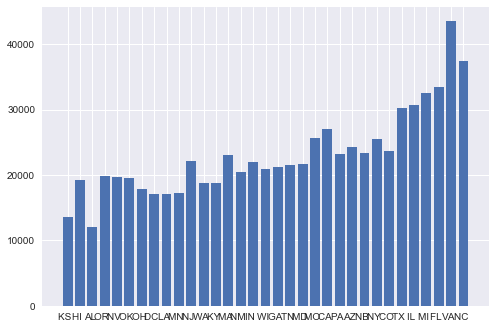

In [123]:
plt.bar(dfIncomeDroppedUnderAged['state_code'],dfIncomeDroppedUnderAged['stateCodeAverage'])

In [36]:
transactionsInformation

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


In [37]:
transactionsDataFrame = transactionsInformation[['acct_nbr',"tran_amt"]].groupby('acct_nbr').mean().sort_values(by='tran_amt')

In [38]:
transactionsDataFrame['average'] = transactionsDataFrame.groupby('acct_nbr').mean()

In [39]:
transactionsDataFrame['numberOfTransactions'] = transactionsInformation.acct_nbr.value_counts()

In [40]:
transactionsDataFrame.describe()

,tran_amt,average,numberOfTransactions
count,1398.000000,1398.000000,1398.000000
mean,12.627973,12.627973,55.493562
std,279.413091,279.413091,33.295895
min,-351.851852,-351.851852,1.000000
25%,-19.244820,-19.244820,26.000000
50%,-1.711149,-1.711149,45.000000
75%,7.776392,7.776392,99.000000
max,8735.140000,8735.140000,155.000000


In [41]:
transactionsDataFrame.sort_values(by=["tran_amt","numberOfTransactions"], ascending=[False,False])

,tran_amt,average,numberOfTransactions
acct_nbr,,,
4561143213632370,8735.140000,8735.140000,1
4561143213626190,3905.040000,3905.040000,1
4561143213631460,2814.610000,2814.610000,1
4561143213631690,1749.600000,1749.600000,1
4561143213631330,1675.890000,1675.890000,1
...,...,...,...
4561143213633110,-225.000000,-225.000000,12
4561143213629170,-261.538462,-261.538462,26
4561143213628320,-293.103448,-293.103448,29


In [42]:
transactionsInformation.acct_nbr.value_counts()

4561143213630020    155
4561143213626830    141
4561143213627770    137
4561143213632490    131
4561143213629780    112
                   ... 
4561143213631330      1
4561143213626190      1
4561143213631460      1
4561143213631690      1
4561143213632370      1
Name: acct_nbr, Length: 1398, dtype: int64

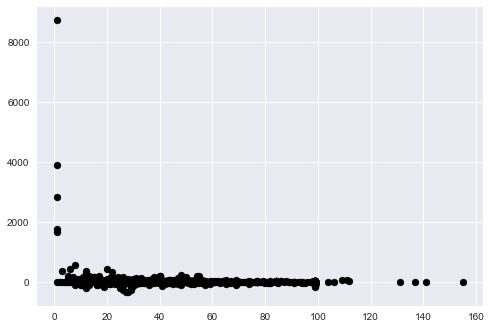

In [43]:
plt.scatter(transactionsDataFrame['numberOfTransactions'],transactionsDataFrame['average'],c='black')

In [44]:
def plot_distortions(X,max_clusters=10):
    distortions = []
    for i in range(1,max_clusters+1):
        km = KMeans(n_clusters=i,init="k-means++",n_init=10,random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
    
    plt.plot(range(1,max_clusters+1),distortions,marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortions')
    plt.show()

In [124]:
customerAge_Income = dfIncomeDroppedUnderAged[['age','income']]

C:\Users\Jimmy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


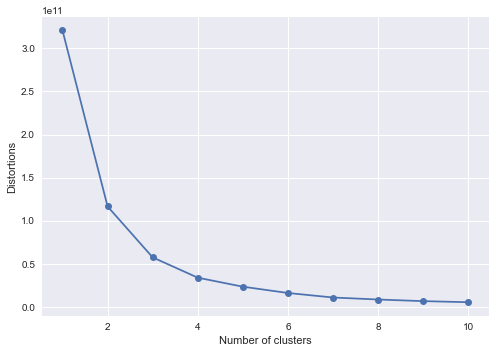

In [125]:
plot_distortions(customerAge_Income,10)

In [47]:
def plot_clusters(X,y_res,plt_cluster_centers=False):
    X_centroids = []
    Y_centroids = []


    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,y,s=50,marker='s',label=f'cluster{cluster}')
    
    if plt_cluster_centers:
        plt.scatter(X_centroids,Y_centroids,marker='*',c='red',s=250,label='centroids')

    plt.legend()
    plt.grid()
    plt.show()


In [48]:
km = KMeans(n_clusters=3,n_init=10,random_state=0)
y_km = km.fit_predict(customerAge_Income)

In [49]:
km.fit(customerAge_Income)
y_kmeans = km.predict(customerAge_Income)

In [50]:
plt.style.use('seaborn')

In [51]:
customerInformation.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
50,1362729,0,13,5,0,M,1,,Bruce ...,Kraus ...,1223,Vine ...,10104,New York City,NY
51,1362668,0,13,5,0,M,1,,Chiman ...,Boyd ...,16437,37th ...,90750,Long Beach,CA
91,1362523,0,13,5,0,F,1,,Julie ...,Morton ...,8369,Madison ...,90061,Los Angeles,CA
202,1362496,0,13,2,0,M,1,,Douglas ...,McMillen ...,2968,Leek ...,77058,Houston,TX
265,1363064,0,13,5,0,F,1,,Isabel ...,Gold ...,7879,Third ...,14622,Rochester,NY


In [52]:
customerInformation = customerInformation.sort_values(by=['age','income'])

In [ ]:
pca = PCA().fit(data_rescaled)

<BarContainer object of 666 artists>

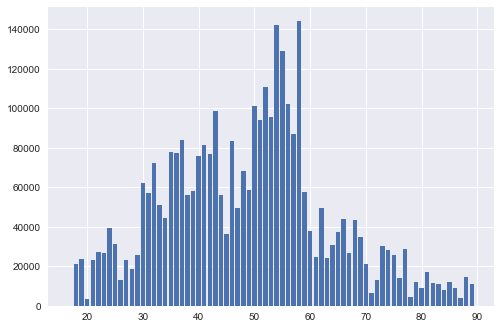

In [126]:
plt.bar(dfIncomeDroppedUnderAged['age'],dfIncomeDroppedUnderAged['income'])

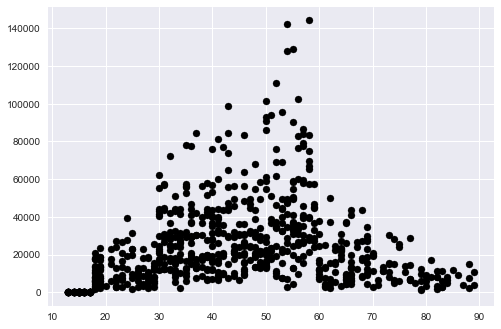

In [54]:
plt.scatter(customerInformation['age'],customerInformation['income'],c='black')

<BarContainer object of 747 artists>

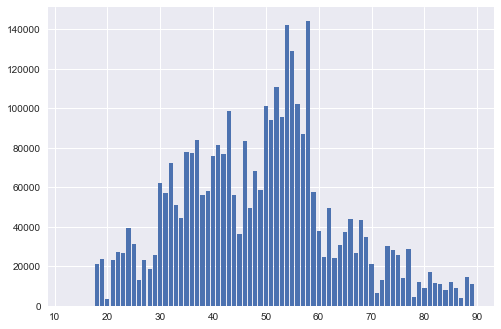

In [55]:
plt.bar(customerInformation['age'],customerInformation['income'])

In [56]:
accountCustomerInformation = customerInformation.merge(accountInformation,on="cust_id")

In [57]:
accountCustomerInformation.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,...,postal_code,city_name,state_code,acct_nbr,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362729,0,13,5,0,M,1,,Bruce ...,Kraus ...,...,10104,New York City,NY,13627293,SV,Y,21.4.1993,NaN,120.41,122.21
1,1362668,0,13,5,0,M,1,,Chiman ...,Boyd ...,...,90750,Long Beach,CA,13626683,SV,Y,29.11.1990,NaN,213.91,1470.67
2,1362523,0,13,5,0,F,1,,Julie ...,Morton ...,...,90061,Los Angeles,CA,13625233,SV,Y,26.6.1992,NaN,262.21,127.38
3,1362496,0,13,2,0,M,1,,Douglas ...,McMillen ...,...,77058,Houston,TX,13624963,SV,Y,7.12.1994,NaN,247.34,251.06
4,1363064,0,13,5,0,F,1,,Isabel ...,Gold ...,...,14622,Rochester,NY,13630643,SV,Y,9.6.1995,NaN,220.97,1103.03


In [58]:
accountCustomerInformation.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,...,postal_code,city_name,state_code,acct_nbr,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362729,0,13,5,0,M,1,,Bruce ...,Kraus ...,...,10104,New York City,NY,13627293,SV,Y,21.4.1993,NaN,120.41,122.21
1,1362668,0,13,5,0,M,1,,Chiman ...,Boyd ...,...,90750,Long Beach,CA,13626683,SV,Y,29.11.1990,NaN,213.91,1470.67
2,1362523,0,13,5,0,F,1,,Julie ...,Morton ...,...,90061,Los Angeles,CA,13625233,SV,Y,26.6.1992,NaN,262.21,127.38
3,1362496,0,13,2,0,M,1,,Douglas ...,McMillen ...,...,77058,Houston,TX,13624963,SV,Y,7.12.1994,NaN,247.34,251.06
4,1363064,0,13,5,0,F,1,,Isabel ...,Gold ...,...,14622,Rochester,NY,13630643,SV,Y,9.6.1995,NaN,220.97,1103.03


In [59]:
accountInformation.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [60]:
accountInformation

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28
...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,CC,N,20.1.1992,19.8.1995,1433.94,20.00
1405,4561143213626240,1362624,CC,Y,29.11.1990,NaN,632.75,1400.00
1406,4561143213628750,1362875,CC,Y,24.2.1989,NaN,2810.91,3000.00
1407,13626543,1362654,SV,Y,17.10.1992,NaN,784.53,622.46
